<img src='images/gesis.png' style='height: 50px; float: left'>
<img src='images/social_comquant.png' style='height: 50px; float: left; margin-left: 40px'>

# D5. Supervised machine learning

Machine learning

Unsupervised and supervised

Supervised: regression (from linear regression to neural networks) and classification

Explanation vs. prediction; induction and deduction

Size of data and patterns in it; primary objective is to avoid under and overfitting (where it may be advised to not use all the information data you have)

Data leakage

standardization and cross-validation

Interpretability and use of prediction in CSS


> Varieties of Democracy (V-Dem) is a unique approach to conceptualizing and measuring democracy. V-Dem distinguishes between five high-level principles of democracy: electoral, liberal, participatory, deliberative, and egalitarian, and collects data to measure these principles. ([Source](https://www.v-dem.net/about/))

The V-Dem dataset consists of countries (observations in rows) described by several hundred of variables (in columns) obtained by surveys, from country websites, and from other sources. We use data about electoral democracy for the year 2019. The following figure shows that several **indicators** (shown in the top row) are supposed to measure five latent low-level **indices** (from "Freedom of expression" to "Elected officials") which explain the high-level **index** of "Electoral democracy". In the regression part, we will reduce the number of variables and cluster the countries. In the classification part, we will predict a continuous numerical measure of a nation's internet freedoms and a four-part regime classification from the indices and indicators.

<img src='images/vdem.jpg' style='width: 800px'>

...

## D5.1. Explanation (statistical modeling)

- model fit r^2
- hypothesis and significance testing
- generalized linear model: linear and logistic regression

https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

### D5.1.1. Data

In [1]:
import pandas as pd

In [2]:
vdem = pd.read_csv(filepath_or_buffer='../data/vdem.tsv', sep='\t', encoding='utf-8', low_memory=False)
vdem = vdem.set_index('country_name')
vdem

,total_score,v2x_regime,v2x_polyarchy,v2x_freexp_altinf,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,...,v2elembaut,v2elembcap,v2x_elecoff,v2lgbicam,v2lgello,v2lginello,v2expathhs,v2exdfcbhs,v2exdfdmhs,v2exhoshog
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,1.0,0.353,0.696,0.327,-0.392,0.420,1.337,1.497,1.532,...,-0.569,-0.560,1.000,2.0,100.0,0.0,7.0,-0.588,1.005,1.0
Albania,NaN,1.0,0.486,0.639,-0.039,0.526,0.476,1.086,0.438,-0.604,...,0.701,0.353,1.000,1.0,100.0,0.0,6.0,-1.225,-1.068,0.0
Algeria,NaN,1.0,0.287,0.521,-1.063,0.476,-0.122,-0.096,0.810,0.469,...,-0.931,-1.228,1.000,2.0,100.0,0.0,7.0,1.495,1.421,0.0
Angola,64.0,1.0,0.365,0.653,1.026,0.552,0.997,0.855,-0.317,1.255,...,-0.939,-0.772,1.000,1.0,100.0,0.0,6.0,1.629,1.005,1.0
Argentina,72.0,2.0,0.771,0.843,1.274,0.948,1.320,1.419,1.525,0.646,...,1.614,1.624,1.000,2.0,100.0,0.0,7.0,2.257,1.879,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,24.0,0.0,0.149,0.137,-1.463,-1.008,-1.360,-2.123,-2.036,-1.439,...,-1.228,1.475,0.000,1.0,100.0,0.0,6.0,-0.821,-1.808,0.0
Yemen,NaN,0.0,0.119,0.196,-2.238,-1.355,-0.593,-0.153,-0.613,-1.161,...,-1.278,-0.697,0.000,2.0,100.0,0.0,1.0,0.942,1.507,0.0
Zambia,58.0,1.0,0.338,0.648,-0.983,0.212,0.588,0.752,1.352,0.406,...,0.402,-1.696,0.970,1.0,94.0,0.0,7.0,1.915,1.638,1.0


In [3]:
# high-level index
index = ['v2x_polyarchy']

# low-level indices
indices = ['v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff']

# indicator variables
indicators = ['v2mecenefm', 'v2meharjrn', 'v2meslfcen', 'v2mebias', 'v2merange', 'v2mecrit', 'v2cldiscm', 'v2cldiscw', 'v2clacfree', 'v2psparban', 'v2psbars', 'v2cseeorgs', 'v2csreprss', 'v2elsuffrage', 'v2elembaut', 'v2elembcap', 'v2lgbicam', 'v2lgello', 'v2lginello', 'v2expathhs', 'v2exdfcbhs', 'v2exdfdmhs', 'v2exhoshog']

In [4]:
len(indicators)

23

In [5]:
# get correlations
vdem[indices].corr()

,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff
v2x_freexp_altinf,1.000000,0.937674,0.242301,0.771424,0.491415
v2x_frassoc_thick,0.937674,1.000000,0.271834,0.742071,0.534515
v2x_suffr,0.242301,0.271834,1.000000,0.217667,0.378996
v2xel_frefair,0.771424,0.742071,0.217667,1.000000,0.294804
v2x_elecoff,0.491415,0.534515,0.378996,0.294804,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

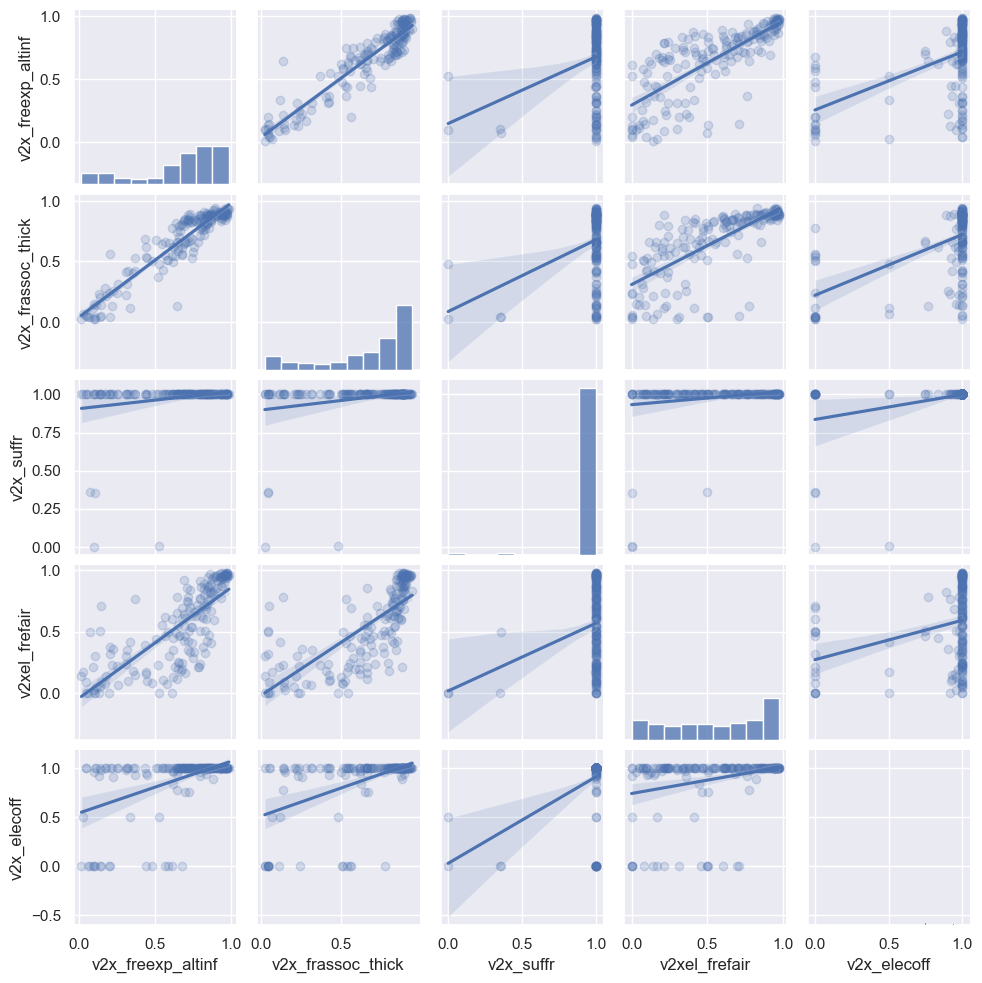

In [7]:
## plot correlations
fig = sns.pairplot(
    data = vdem[indices], 
    height = 2, 
    kind = 'reg', 
    diag_kind = 'hist', 
    plot_kws = {'scatter_kws': {'alpha': .2}}
)
#fig.savefig('results/...vdem_fh_pairplot.png')
plt.show()

### D5.1.2. Linear regression

#### Ordinary-Least-Squares regression

We will predict `total_score`, a continuous numerical measure of a nation's internet freedoms, by the five low-level indices.

In [8]:
# remove missing values
vdem_regression = vdem[~vdem['total_score'].isnull()]

In [9]:
# get array of independent variables
X_regression_sm = vdem_regression[indices].to_numpy()
X_regression_sm.shape

(63, 5)

In [10]:
# get numerical dependent variable
y_regression_sm = vdem_regression[['total_score']].to_numpy()

sklearn does not report p values. Use: statsmodels

In [11]:
from statsmodels.api import OLS, add_constant

In [12]:
# add column of ones to model the intercept
X_regression_sm = add_constant(X_regression_sm)

In [13]:
# fit model to data
ols_sm = OLS(y_regression_sm, X_regression_sm) # equivalent to fit_intercept=True in sklearn (https://stackoverflow.com/questions/70179307/why-is-sklearn-r-squared-different-from-that-of-statsmodels-when-fit-intercept-f/70180217#70180217)
ols_sm = ols_sm.fit()

In [14]:
ols_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     52.10
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           5.07e-20
Time:                        14:39:22   Log-Likelihood:                -225.51
No. Observations:                  63   AIC:                             463.0
Df Residuals:                      57   BIC:                             475.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5154      7.796      2.760      0.008       5.903      37.127
x1            19.8931     12.941      1.537      0.130      -6.021      45.807
x2            26.2387     13.594      1.930      0.059      -0.983      53.461
x3           -10.9672      8.792     -1.247      0.217     -28.572       6.638
x4            18.4545      5.691      3.243      0.002       7.058      29.851
x5             6.2517      3.993      1.566      0.123      -1.744      14.248
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.204
Skew:                          -0.291   Prob(JB):                        0.548
Kurtosis:                       3.345   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# goodness of fit (R^2)
ols_sm.rsquared.round(3)

0.82

In [16]:
# intercept and coefficients
ols_sm.params.round(4)

array([ 21.5154,  19.8931,  26.2387, -10.9672,  18.4545,   6.2517])

In [17]:
# significance scores
ols_sm.pvalues.round(3)

array([0.008, 0.13 , 0.059, 0.217, 0.002, 0.123])

In [18]:
import numpy as np

In [19]:
def format_coef(df, coef, pvalues=None):
    df[coef] = df[coef].apply(lambda x: '{0:.4f}'.format(x))
    if pvalues is not None:
        def stars(cell):
            if cell <= .001:
                cell = '***'
            elif cell <= .01:
                cell = '**'
            elif cell <= .05:
                cell = '*'
            else:
                cell = ''
            return cell
        df['pvalues'] = pvalues
        df['stars'] = df['pvalues'].apply(stars)
        df[coef] = df[coef] + df['stars']
        del df['pvalues']
        del df['stars']
    return df

In [20]:
vdem_coef = pd.DataFrame(
    data = ols_sm.params, 
    index = np.concatenate([['intercept'], indices]), 
    columns = ['OLS']
)
vdem_coef = format_coef(df=vdem_coef, coef='OLS', pvalues=ols_sm.pvalues)
vdem_coef

,OLS
intercept,21.5154**
v2x_freexp_altinf,19.8931
v2x_frassoc_thick,26.2387
v2x_suffr,-10.9672
v2xel_frefair,18.4545**
v2x_elecoff,6.2517


#### Ridge regression to deal with collinearity

Significance scores are meaningless with regularization (https://stats.stackexchange.com/questions/224796/why-are-confidence-intervals-and-p-values-not-reported-as-default-for-penalized)

Ridge regression requires setting scaling penalties: https://stackoverflow.com/questions/72260808/mismatch-between-statsmodels-and-sklearn-ridge-regression

In [21]:
# fit model to data
n = vdem_regression.shape[0]
penalty_ridge = np.concatenate([[0.], np.ones(len(indices))]) / n
ridge_sm = OLS(y_regression_sm, X_regression_sm)
ridge_sm = ridge_sm.fit_regularized(alpha=penalty_ridge, L1_wt=0.)

# display rsults
vdem_coef['Ridge'] = ridge_sm.params
vdem_coef = format_coef(df=vdem_coef, coef='Ridge', pvalues=None)
vdem_coef

,OLS,Ridge
intercept,21.5154**,18.0586
v2x_freexp_altinf,19.8931,20.3341
v2x_frassoc_thick,26.2387,20.8064
v2x_suffr,-10.9672,-4.4388
v2xel_frefair,18.4545**,18.3118
v2x_elecoff,6.2517,6.3252


#### Lasso regression to automatically select variables

Lasso regression requires setting scaling penalties: https://stackoverflow.com/questions/72260808/mismatch-between-statsmodels-and-sklearn-ridge-regression

In [22]:
# fit model to data
alpha_lasso = 1. # if alpha < 1. then Lasso becomes Elastic Net (https://stats.stackexchange.com/questions/319861/how-to-interpret-lasso-shrinking-all-coefficients-to-0)
penalty_lasso = np.concatenate([[0.], np.ones(len(indices)) * alpha_lasso])
lasso_sm = OLS(y_regression_sm, X_regression_sm)
lasso_sm = lasso_sm.fit_regularized(alpha=penalty_lasso, L1_wt=1.) # reuse 'OLS' object

# display rsults
vdem_coef['Lasso'] = lasso_sm.params
vdem_coef = format_coef(df=vdem_coef, coef='Lasso', pvalues=None)
vdem_coef

,OLS,Ridge,Lasso
intercept,21.5154**,18.0586,21.8229
v2x_freexp_altinf,19.8931,20.3341,26.6288
v2x_frassoc_thick,26.2387,20.8064,14.3902
v2x_suffr,-10.9672,-4.4388,0.0000
v2xel_frefair,18.4545**,18.3118,12.7433
v2x_elecoff,6.2517,6.3252,0.0000


#### Ordinary-Least-Squares regression with the variables selected in Lasso regression

In [23]:
# get array of independent variables
variables_select = vdem_coef[vdem_coef['Lasso'].astype(float) != 0].index.tolist()
X_regression_sm_select = X_regression_sm[:, [i for i, e in enumerate(vdem_coef.index) if e in variables_select]]

# fit model to data
ols_sm_select = OLS(y_regression_sm, X_regression_sm_select) # equivalent to fit_intercept=True in sklearn (https://stackoverflow.com/questions/70179307/why-is-sklearn-r-squared-different-from-that-of-statsmodels-when-fit-intercept-f/70180217#70180217)
ols_sm_select = ols_sm_select.fit()

# display results
vdem_coef_select = pd.DataFrame(
    data = ols_sm_select.params, 
    index = variables_select, 
    columns = ['OLS (select)']
)
vdem_coef_select = format_coef(df=vdem_coef_select, coef='OLS (select)', pvalues=ols_sm_select.pvalues)
vdem_coef = pd.merge(left=vdem_coef, right=vdem_coef_select, left_index=True, right_index=True, how='left')
vdem_coef

,OLS,Ridge,Lasso,OLS (select)
intercept,21.5154**,18.0586,21.8229,15.0485***
v2x_freexp_altinf,19.8931,20.3341,26.6288,19.3388
v2x_frassoc_thick,26.2387,20.8064,14.3902,28.6047*
v2x_suffr,-10.9672,-4.4388,0.0000,NaN
v2xel_frefair,18.4545**,18.3118,12.7433,18.4580**
v2x_elecoff,6.2517,6.3252,0.0000,NaN


### D5.1.3. Logistic regression

In [24]:
X_classification = vdem[indices].to_numpy()
X_classification_const = add_constant(X_classification)
y_classification_binary = np.where(vdem['v2x_regime'] <= 1, 0, 1).copy()

In [25]:
from statsmodels.api import Logit

In [26]:
logit_sm = Logit(y_classification_binary, X_classification_const)
logit_sm = logit_sm.fit()

         Current function value: 0.000001
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
logit_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  176
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                   1.000
Time:                        14:39:22   Log-Likelihood:            -0.00019723
converged:                      False   LL-Null:                       -121.81
Covariance Type:            nonrobust   LLR p-value:                 1.282e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -324.3409   4.31e+05     -0.001      0.999   -8.46e+05    8.45e+05
x1           256.0682   1.53e+04      0.017      0.987   -2.97e+04    3.02e+04
x2           330.2626   5.63e+04      0.006      0.995    -1.1e+05    1.11e+05
x3          -310.1196   4.32e+05     -0.001      0.999   -8.48e+05    8.47e+05
x4           350.5838   4.82e+04      0.007      0.994   -9.42e+04    9.49e+04
x5            14.9778   4095.179      0.004      0.997   -8011.425    8041.381
==============================================================================

Possibly complete quasi-separation: A fraction 0.99 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [28]:
# goodness of fit
logit_sm.prsquared.round(3)

1.0

In [29]:
# intercept and coefficients
logit_sm.params.round(4)

array([-324.3409,  256.0682,  330.2626, -310.1196,  350.5838,   14.9778])

In [30]:
# significance scores
logit_sm.pvalues.round(3)

array([0.999, 0.987, 0.995, 0.999, 0.994, 0.997])

## D5.2. Prediction

### D5.2.1. Regression

- Out-of-sample testing
- Cross validation
- Data leakage
- Feature selection
- Over- and underfitting

- https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


##### Preparing the data

In [31]:
# choose which predictors to use
predictors = indices # indices or indicators

In [32]:
# get array of predictor variables
X_regression = vdem_regression[predictors].to_numpy()

In [33]:
# get numerical response variable
y_regression = vdem_regression[['total_score']].to_numpy()

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
# standardize variables
X_regression = StandardScaler().fit_transform(X_regression)
y_regression = np.ravel(StandardScaler().fit_transform(y_regression))

##### Splitting data into sets to train and test the model

For developing machine learning models we need to split our data; some for training the model and others for testing and validating it. Without splitting, our model will simply learn to retrodict data that it has already seen, rather than predicting the data it has not.

Every time you split your data, you remove some of the information the model can learn from. If you remove too much, a full train/validation/test split might impact your model’s performance in a negative way.

Fortunately, we can sidestep this issue without sacrificing any principles. The process follows these steps:
1. Split your data into train and test sets. All of the training data will be fully available
to train on. The test set will not be used in any way until a final model has been
selected.
2. Use cross-validation (explained later in this section) to produce an optimal set of training
hyperparameters.
3. Select the best cross-validated model and evaluate using test data.

We can complete the first step in Sklearn using `train_test_split()` function. Below, we separate our data into two objects: `X` and `y`. Doing so brings us inline with a long-standing convention that the predictor data is stored in an upper-case X, indicating a matrix of covariates, or **design matrix**. The lower-case y, or the **target**, indicates a vector of outcome values. The machine learning models we employ will
learn how to predict the y values using the X values.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# split data into training and test sets
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(
    X_regression, 
    y_regression, 
    test_size=.5, 
    random_state=42, 
    shuffle=True
)

#### Linear Regression

The linear regression model is about as transparent and interpretable as machine
learning gets. Linear regression models are algorithmically simple, and since they
have been widely used in the social sciences, they're rather easier to begin with if you don't have much experience with machine learning.

In an OLS regression, we model an outcome of interest (y) as a
function of a weighted sum of input features (X) and random error. The *weights* in a
linear model are the coefficients, which are *learnt* during training. For example, we
might predict the degree of internet freedom in a country as a linear function of some other
regime characteristics.

In the context of machine learning, the goal with a regression model such as this is to
find a line (if you have one feature), a plane (if you have two features), or a hyperplane
(if you have three or more features) that best fits the data. When we fit our model to the
training data, it *learns* the best value for the intercept and slope by minimizing the
mean-squared error (MSE), which is the sum of the squared differences between each
observed value in the data and the predicted value from the model.

In order to do this, we first need to create an OLS object as follows, and then learn the model parameters by fitting the model to our training data:

##### Fitting model on training set

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# create LinearRegression object and regress y on X
lr = LinearRegression(fit_intercept=False).fit(X=X_regression_train, y=y_regression_train)

In [40]:
# get coefficients
lr.coef_.round(4)

array([0.1755, 0.1966, 0.08  , 0.5929, 0.0322])

We can check to see how well the model managed to to fit our data using R^2 score. It measures how much of the variance in the dependent variable can be explained by the model; a score of 1 indicates a perfect fit.

In [41]:
# get coefficient of determination (model fit)
lr.score(X=X_regression_train, y=y_regression_train).round(3)

0.85

0.85 is a pretty high score for R^2, it means that our trained model is capable of accounting for roughly 85% of the variance in the training data with just six parameters (including the intercept). This could indicate overfitting to the training data, meaning that our model can perform very well on the data it has learned from, but it's not that capable when encountering new data. In order to examine that, we will use cross-validation.

**Cross-validation** builds on the intuition behind training and testing sets, but does so
repeatedly, training and assessing models each time. The most common type of cross-
validation in machine learning is **k-fold cross-validation**, which splits our data into k
number of equally sized folds. We then use these folds as a sliding window of training and
validation splits. If we are doing fivefold cross-validation, we segment our dataset into
five folds and fit and assess five models.

The first model is trained using the data
contained in folds 2 to 5 and then validated on the data on in fold 1. The second model
is trained on the data in fold 1 and folds 3 to 5 and validated on the data in fold 2, and
so on. The model evaluation scores are computed for all five and then examined
together, or summarized as an average. If we are using accuracy as our evaluation
score, ideally we would see that all five accuracy measures are high and reliable; if
there is a lot of variation in our accuracy scores, then the model is likely over-relying on
characteristics of data in some of the folds.


Putting OLS and CV together: The code below is going to produce five scores from the five training–validations splits it produces internally. We’re primarily interested in the stability of the score (how much it
fluctuates between the folds).

If our model is consistent in its performance but not as accurate as we would like, then
we have to improve our analysis. We might improve the quality of the input data or
make improvements to the model itself. If we see a lot of variation in the model accuracy
on different folds, then we have a different problem and we need to change how we
segment our data into folds.

In [42]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [43]:
shufflesplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [44]:
# regress y on X five times using five folds and shuffled splits
score_cv_lr = cross_val_score(
    estimator = LinearRegression(fit_intercept=False), 
    X = X_regression_train, 
    y = y_regression_train, 
    scoring = 'r2', 
    cv = shufflesplit
)
score_cv_lr.round(3)

array([0.48 , 0.026, 0.823, 0.867, 0.853])

Three of the scores are excellent, falling somewhere in the high 0.7 to low 0.8 range.
The remaining two are far worse. Our model’s performance seems to depend on which
data it trains on (and, equivalently, the data upon which it must validate itself).

The gap between our high and low cross-validation scores might indicate that our data
is ordered or clustered in some way. It could be that our observations appear in
alphabetical order by country name, or something similar. In such cases, it can be
useful to shuffle the data before we split it to ensure that we are not simply rolling over
one group at a time. Doing this is as simple as using Sklearn’s `ShuffleSplit()`,
which takes two arguments: **the number** (supplied as an integer) or **percentage**
(supplied as a float) of instances to sample for the training and test sets, and the
**number of iterations**, or **splits**, to perform. You can then pass the resulting object into
`cross_val_score`’s cv argument, and Sklearn smoothly handles the rest:

As you can see, by simply randomizing the order in which our observations appear, we were able to smooth out our R^2 scores.

Cheating on the Test: Now let’s take the mean value across all folds and use that as a point of comparison:

In [84]:
# get average coefficient of determination
score_cv_lr.mean().round(3)

0.61

The score from our cross-validation (0.61) is ... lower than the one we ...
received by training on the training dataset (0.85), but that’s to be expected. We can
think of the cross-validation score as a *validation score* in the sense that it measures
our model’s performance on data it wasn’t able to train on (averaged across five
different configurations of that set-up). Our original OLS model, by comparison, was
able to train on the entire dataset at once; its score represents how well it fit the data it
trained on.

A remedy to the overfitting issue is often to make your model *less powerful* or to use some kind of regularization technique. Remember, though, that under normal circumstances, we wouldn’t be able to see our model’s test score. In an attempt to wean ourselves off of test scores, we’re going to spend the rest of this section creating
regularized models without examining the test scores (we’ll save that for the very end).

#### Regularization via Ridge Regression

We recognize an overfitting problem when the quality of a model drops when making
predictions on the test set. To address this, we could provide some additional
constraints to prevent our model from learning too much from the training data. One
method is ridge regression, which uses L2 regularization to make the coefficients as
close to 0 as possible while still making good predictions. In effect, L2 regularization
applies a penalty to model parameters that scales with their magnitude. This means that
your model is incentivized to keep each parameter value as small as possible. This
tension is useful for preventing overfitting.

To fit a ridge regression model, we follow the same process as before, only unlike our
OLS model, ridge regression accepts one important hyperparameter: **alpha**. The
alpha hyperparameter determines the strength of the regularizing penalty the ridge
regression applies to each of our parameters; the higher it is, the stronger it is. It
defaults to a value of 1, which is generally a good starting point. We’ll start by creating a
fresh set of training and test data (with a new random seed):

In [46]:
from sklearn.linear_model import Ridge

In [47]:
# regress y on X five times using five folds and shuffled splits
score_cv_ridge = cross_val_score(
    estimator = Ridge(alpha=1., fit_intercept=False), 
    X = X_regression_train, 
    y = y_regression_train, 
    scoring = 'r2', 
    cv = shufflesplit
)
score_cv_ridge.round(3)

array([0.54 , 0.671, 0.888, 0.876, 0.877])

In [48]:
score_cv_ridge.mean().round(3)

0.77

We can see that the use of ridge regression has left us very slightly better off than our
original OLS regression, but not by much. It might be possible to improve the cross-
validation scores by modifying the `alpha` parameter, but let’s try another regularization.

#### Regularization via Lasso Regression

We could use L1 regularization, which penalizes coefficient values that are close to 0
much more harshly than the comparatively light treatment that L2 regularization offers.
The result is that the model is forced to use only a subset of the available features,
which it selects automatically. All other coefficients are set to 0. This approach is called
lasso regression. As with ridge, lasso takes an **alpha** parameter that determines
how aggressive the regularization is. If we have an underfitting problem, then we want
to decrease a to soften the constraints and let the model learn more from the training
data. Conversely, if we have an overfitting problem, we want to increase `alpha` to more
aggressively push the coefficients towards 0 and learn less from the training data.
Creating a lasso regression model is the same process as before:

In [49]:
from sklearn.linear_model import Lasso

In [50]:
# regress y on X five times using five folds and shuffled splits
score_cv_lasso = cross_val_score(
    estimator = Lasso(alpha=1., fit_intercept=False), 
    X = X_regression_train, 
    y = y_regression_train, 
    scoring = 'r2', 
    cv = shufflesplit
)
score_cv_lasso.round(3)

array([ 0.032, -0.   , -0.004, -0.007, -0.   ])

In [51]:
score_cv_lasso.mean().round(3)

0.004

Our cross-validation R^2 score with default parameter settings (alpha=1) is negative, which means, ...

We might be able to squeeze a bit more life out of our regularized models by tweaking
the `alpha` hyperparameter. If not specified, `alpha` defaults to 1. As `alpha` increases, the
model becomes more simple, more constrained, and more regularized. As it decreases,
the model becomes more complex, less constrained, less regularized. Let’s compare the results of a series of ridge and lasso regressions on this data using
different `alpha` parameters. We will define a set of `alpha` values, estimate a series of
ridge and lasso regressions, and then plot their R^2 scores for comparison:

In [52]:
alphas = np.logspace(-4, 2, 100)

scores_cv_ridge = []
scores_cv_lasso = []

for alpha in alphas:
    scores_cv_ridge.append(cross_val_score(estimator=Ridge(alpha=alpha, fit_intercept=False), X=X_regression_train, y=y_regression_train, cv=shufflesplit).mean())
    scores_cv_lasso.append(cross_val_score(estimator=Lasso(alpha=alpha, fit_intercept=False), X=X_regression_train, y=y_regression_train, cv=shufflesplit).mean())
    
scores = pd.DataFrame(
    zip(alphas, scores_cv_ridge, scores_cv_lasso), 
    columns = ['alpha', 'Ridge Regression', 'Lasso Regression'])

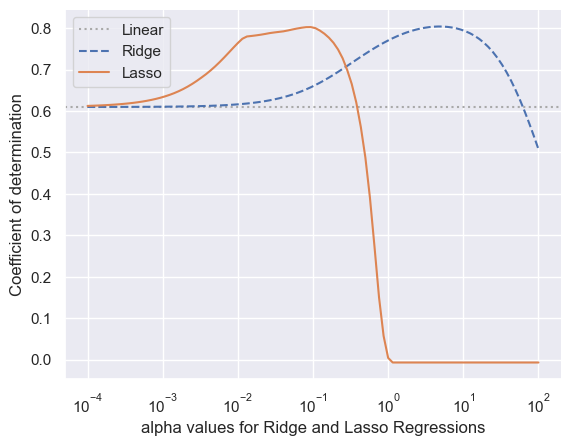

In [85]:
fig, ax = plt.subplots()
ax.axhline(score_cv_lr.mean(), label='Linear', linestyle='dotted', color='darkgray')
sns.lineplot(x='alpha', y='Ridge Regression', data=scores, label='Ridge', linestyle='dashed')
sns.lineplot(x='alpha', y='Lasso Regression', data=scores, label='Lasso', linestyle='solid')
ax.set(xlabel='alpha values for Ridge and Lasso Regressions', ylabel='Coefficient of determination', xscale='log')
sns.despine()
ax.legend()
plt.show()

As you can see, all three of the model types we’re testing – ridge, lasso, and OLS
– converge as `alpha` approaches 0 (we didn’t actually fit any of the models with an
`alpha` of zero, since the models only accept non-negative, non-zero values for `alpha`),
but rapidly diverge thereafter. As `alpha` increases, lasso regression’s performance
increases, falters, and begins a nosedive as `alpha` approaches 0.5. Ridge regression
rises and falls like lasso regression, but over a much larger scale of `alpha`.

Although the peaks of ridge and lasso are close, it would appear that ridge regression
with a haphazardly optimized `alpha` parameter is our best fit for this model. We’ll
retrieve that value of `alpha`, fit a new model, and interpret the results:

In [54]:
max(scores_cv_ridge)

0.8040664517763814

In [55]:
max(scores_cv_lasso)

0.8026520172299945

In [56]:
alpha_best = alphas[scores_cv_ridge.index(max(scores_cv_ridge))]
alpha_best

4.641588833612782

#### Ridge regression with optimized alpha parameter

Let’s use this to fit a ridge regression and get the coefficients:

In [57]:
# create Ridge object and regress y on X
ridge = Ridge(alpha=alpha_best, fit_intercept=False).fit(X=X_regression_train, y=y_regression_train)

In [58]:
ridge.score(X=X_regression_train, y=y_regression_train).round(3)

0.843

##### Evaluating model on test set

Now there's only one step left: testing the model on the test data. Normally, assessing your validated model’s performance on test data should only be done **once you are completely finished developing your models**. If you use your test data to help you improve your model, you’re causing *data leakage*, wherein knowledge your model shouldn’t have access to is being used to improve it. Here, we will just complete the further steps for the sake of indicating how it's done:

In [59]:
lr.score(X=X_regression_test, y=y_regression_test).round(3)

0.667

In [60]:
ridge.score(X=X_regression_test, y=y_regression_test).round(3)

0.74

Alternatively:

In [61]:
# predict response variable
y_lr_pred = lr.predict(X=X_regression_test)
y_ridge_pred = ridge.predict(X=X_regression_test)

In [62]:
#from sklearn.metrics import r2_score

In [63]:
## get coefficient of determination
#r2_score(y_true=y_regression_test, y_pred=y_lr_pred).round(3)

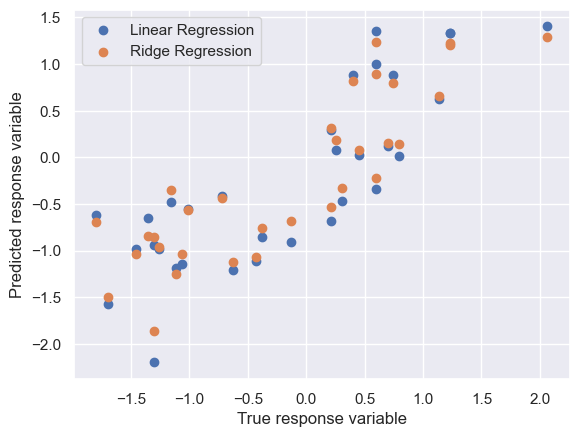

In [64]:
# plot predicted against true response variable
plt.scatter(x=y_regression_test, y=y_lr_pred, label='Linear Regression')
plt.scatter(x=y_regression_test, y=y_ridge_pred, label='Ridge Regression')
plt.xlabel('True response variable')
plt.ylabel('Predicted response variable')
plt.legend()
plt.show()

... the training score (0.85) is substantially higher than the test score (0.67), which is an indication
that our model is overfitting the training data!

It looks good! Each of the predictions is off by a modest amount, but there’s only one truly
off-base prediction (Angola, with a difference of 23). Many predictions are very close!
Like most aspects of machine learning, linear regression isn’t a *one-size-fits-all* solution.
It’s a family of models with a variety of tweakable hyperparameters that deserve your
attention. If you put in the effort, you’ll likely be rewarded with a model that fits the data
well and is highly interpretable. That said, linear regression is not suitable for all tasks;
we will now take a look at a model better suited to classification tasks: **logistic regression**.

#### Decision Tree Regression

Decision trees can be used for both classification and regression tasks. Here we will focus on a classification example, but the process is more or less the same for the regression tasks.

A decision tree is in fact a directed network that starts with a single node including every instance in the data set. Beginning from that node, it *asks* a series of *questions* in order to find the correct labels in a classification problem, or the correct values in a regression problem. A good decision tree should ask the most informative questions in each step; we will see how it can be done shortly. The questions will always concern the value for
some specific feature for each instance, like *Does Canada hold free and fair
elections?* or *Is Canada’s score for freedom of the press higher than the median
score?*

Every time the model asks a question, a node containing some subset of instances in
our dataset splits off into two new nodes. Depending on the answer to the question,
each observation moves from the parent node into one of the two child nodes. This
process continues until 
- All of the observations contained in a node share the same value for the outcome you want the model to be able to predict, or
- Your tree model runs out of room to ask more questions.

The path from the root node
(every instance in the dataset) to each leaf in the tree constitutes a *rule*. We can collect
all of these rules into a single hierarchical rule base that is relatively easy for humans to
interpret and understand.

Now that we know the basics, it’s time to answer a critical question: *How does the
model decide which question to ask next?* How does it know what the *most informative*
question is? The most common method is to use the concept of entropy from
information theory. In information theory, entropy is a measure of how much information
something contains, expressed in terms of uncertainty.

To use a simplified example, let’s say we want to figure out which of the nations in the
VDEM dataset are democracies. If you think elections are all you need to be considered
a democracy, then you could just ask one question for each case – do they hold
elections? *However*, not all elections are the same, and democracies are about much
more than elections. So you keep asking questions until you are confident you can
make a good judgement. The more questions you need to ask to arrive at a confident
judgement, the more accurate your classification of the observations into "democracies"
and "autocracies" will be. The more purely separated those two classes become, the
lower the "entropy" in your model. In the context of a decision tree analysis, the model
will *always* ask the question that will result in the biggest decrease in entropy, usually
expressed in terms of **information gain**, which quantifies the decrease in entropy that
resulted from asking the question.

At this point, there shouldn’t be much doubt about how easily the VDEM dataset we’ve
been using up until here can be classified; nevertheless, we are going to use it
here again. We are not going to do so because it will provide us with a better
classification (we already achieved very good scores using a logistic regression) but
rather because the resultant decision tree model will allow us to easily see what
information the model finds most useful when deciding whether a nation is an autocracy
or a democracy.

As usual, we will start by splitting our dataset into a matrix `X` and and outcome vector `y`:

The technique we’re using to convert the 4-point `v2x_regime` scale into a binary
variable is identical to the one we employed in the previous section.
With `X` and `y` created, we can create our training and test sets, and then create and fit
our decision tree classifier using cross-validation (in much the same way as we did in
the previous section; go back to it for more details on cross-validation).

In [65]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
score_cv_dtr = cross_val_score(estimator=dtr, X=X_regression_train, y=y_regression_train, cv=shufflesplit)
score_cv_dtr.mean().round(3)

0.476

In order to get a sense of what our tree is doing under the hood, the below picture
represents our decision tree. You start at the top node, which contains all of the
observations (countries in this case). The top line in that node (and every non-leaf node
in the remainder of the tree) indicates the rule it will use to split the data. All of the
countries for which that statement is true will travel along the **True** path for further
subdivision. All of the nations for whom this condition does not apply travel along the
**False** path.

In [66]:
interpretable_names = [
    'Freedom of expression',
    'Freedom of association',
    'Share of pop w/ suffrage',
    'Clean elections',
    'Elected officials'
]

In [67]:
import os
directory = 'results'
if not os.path.exists(directory):
    os.makedirs(directory)

In [68]:
from sklearn.tree import export_graphviz
dtr.fit(X=X_regression_train, y=y_regression_train)
export_graphviz(
    decision_tree = dtr,
    out_file = 'results/dtr.dot', 
    filled = False,
    rounded = True,
    feature_names = interpretable_names
)

In [69]:
from pygraphviz import AGraph

In [70]:
G_dtr = AGraph()
G_dtr.read(path='results/dtr.dot')
G_dtr.draw(path='results/dtr.png', prog='dot')

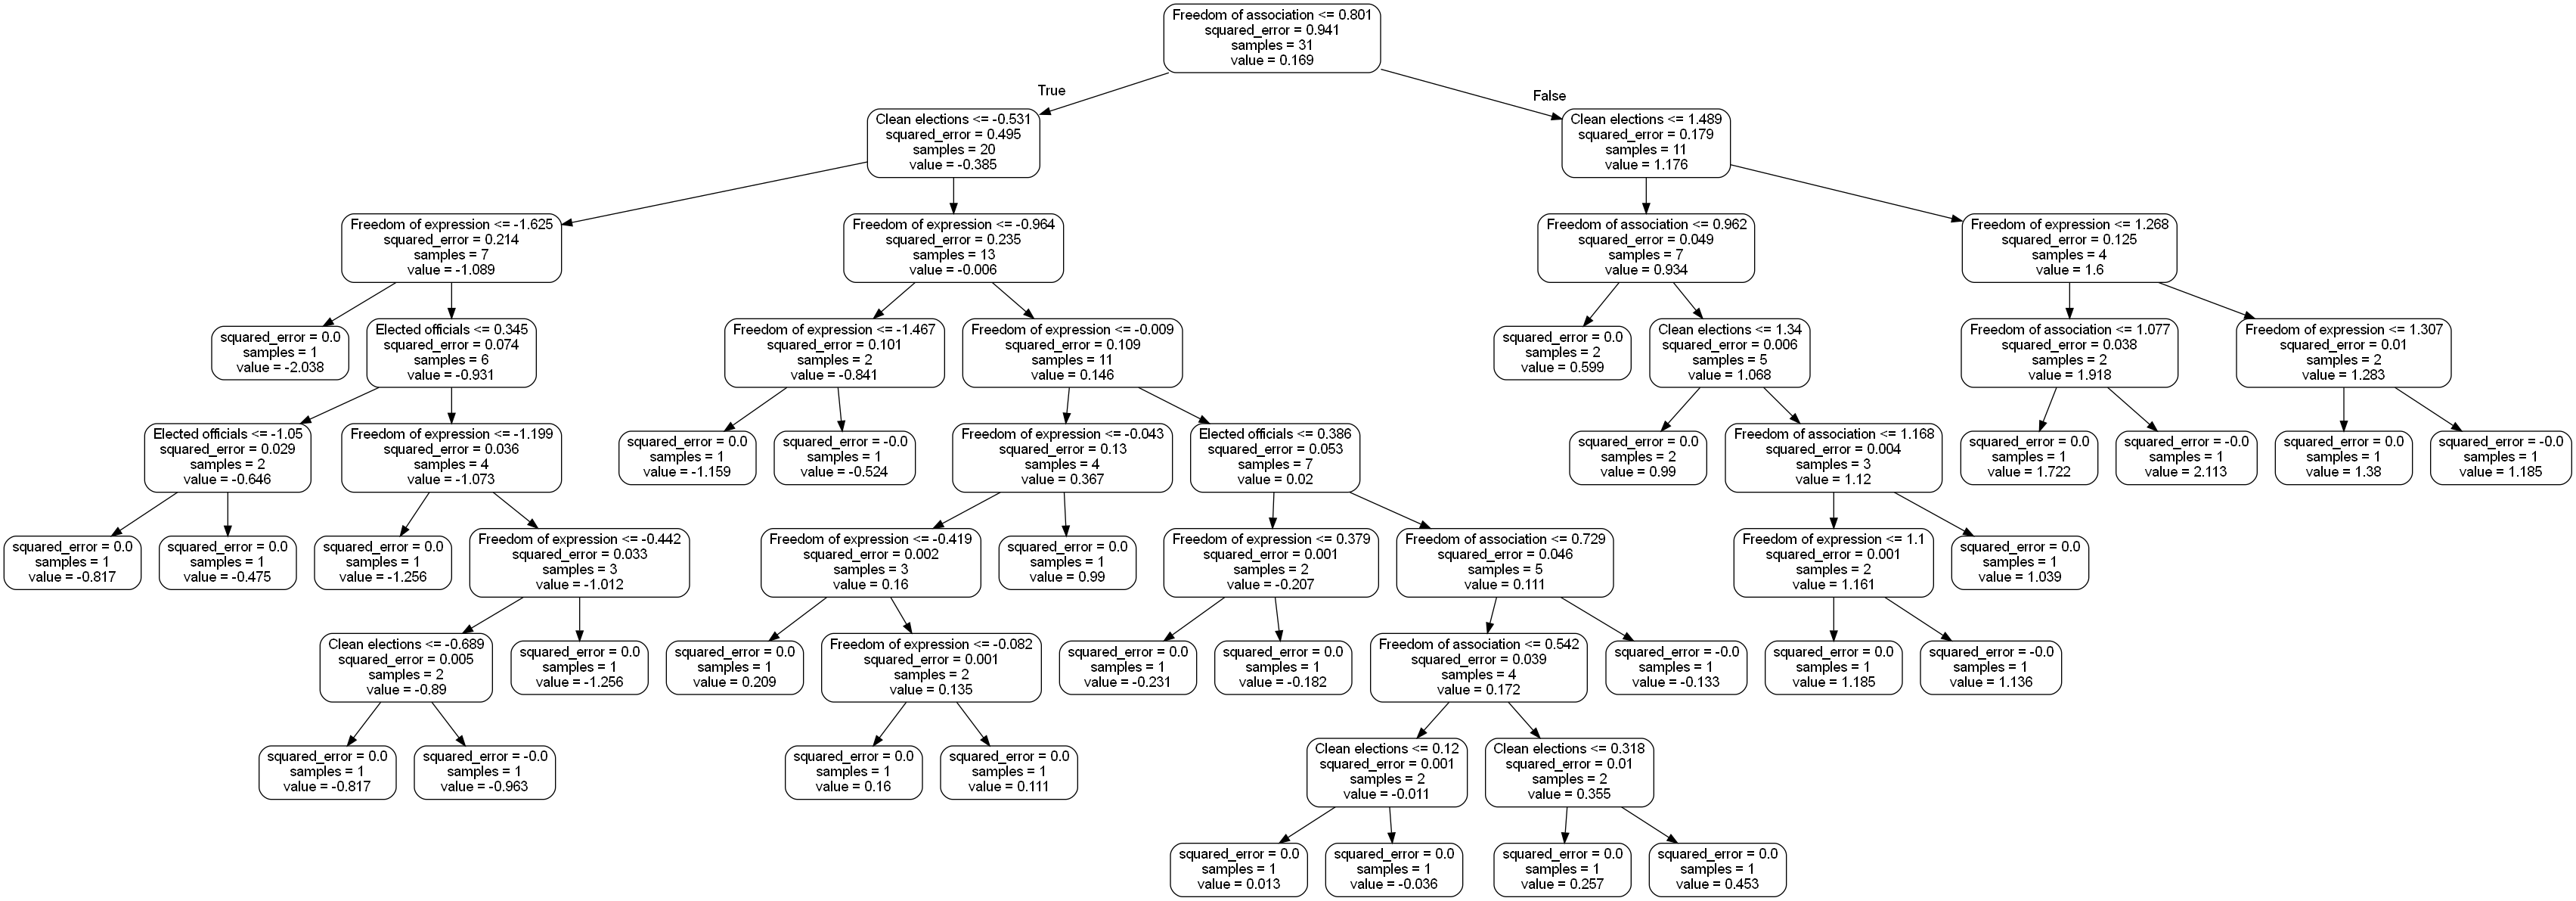

In [71]:
from IPython.display import Image
Image(filename='results/dtr.png')

##### What About Overfitting?

Decision trees are also prone to overfitting. The tree grows bigger with every question, and by the time we’ve reached the leaves, we know
everything we need to know to make predictions that are 100% right 100% of the time -*for the data we trained the model on*. This extreme overfitting is sometimes called
**memorizing** the training data. We don’t want that!

One way to address the overfitting problem with decision trees is to **prune** them.
Remember that the model *always* asks the most informative question first. This means
that as the trees get deeper and deeper (as we ask more questions), each feature is
weaker or less predictive than those that came before it. As we move further and further
out, we risk making decisions based on noise and overfitting the model to the data we
have. The full tree, then, is typically *worse* than a pruned tree because it includes weak
features that could be specific to our dataset and which do not generalize.

We constrain the depth of the tree by restricting the number of questions or decisions
that the model is allowed to ask, and in doing so, we improve the ability of our model to
generalize to data it hasn’t seen before. If we set the maximum depth of our tree to 6,
for example, the models can only ask the six most informative questions, at which point
it must make its prediction. Obviously, this reduces the accuracy on the training data,
but not as much as you might think. It’s the unseen data we care most about, and the
pruned model will make much better predictions when it is not overfitted.

In Sklearn, we specify the maximum depth of the tree in advance. This can be done using the `max_depth` argument for the `DecisionTreeClassifier()`. Let’s set it to 3. This will produce a very shallow tree, but that’s desirable; we want it to have to make the best decisions it can in broad strokes. This way, the model will be less likely to overfit the training data.

In [72]:
dtr_pruned = DecisionTreeRegressor(max_depth=3, random_state=42)
score_cv_dtr_pruned = cross_val_score(estimator=dtr_pruned, X=X_regression_train, y=y_regression_train, cv=shufflesplit)
score_cv_dtr_pruned.mean().round(3)

0.599

In [73]:
dtr_pruned.fit(X=X_regression_train, y=y_regression_train)
export_graphviz(
    decision_tree = dtr_pruned,
    out_file = 'results/dtr_pruned.dot', 
    filled = False,
    rounded = True,
    feature_names = interpretable_names
)

We’ve already seen a modest improvement, which probably represents a
slight reduction in overfitting (something that cross-validation automatically assesses).
Let’s examine the tree again:


In [74]:
G_dtr_pruned = AGraph()
G_dtr_pruned.read(path='results/dtr_pruned.dot')
G_dtr_pruned.draw(path='results/dtr_pruned.png', prog='dot')

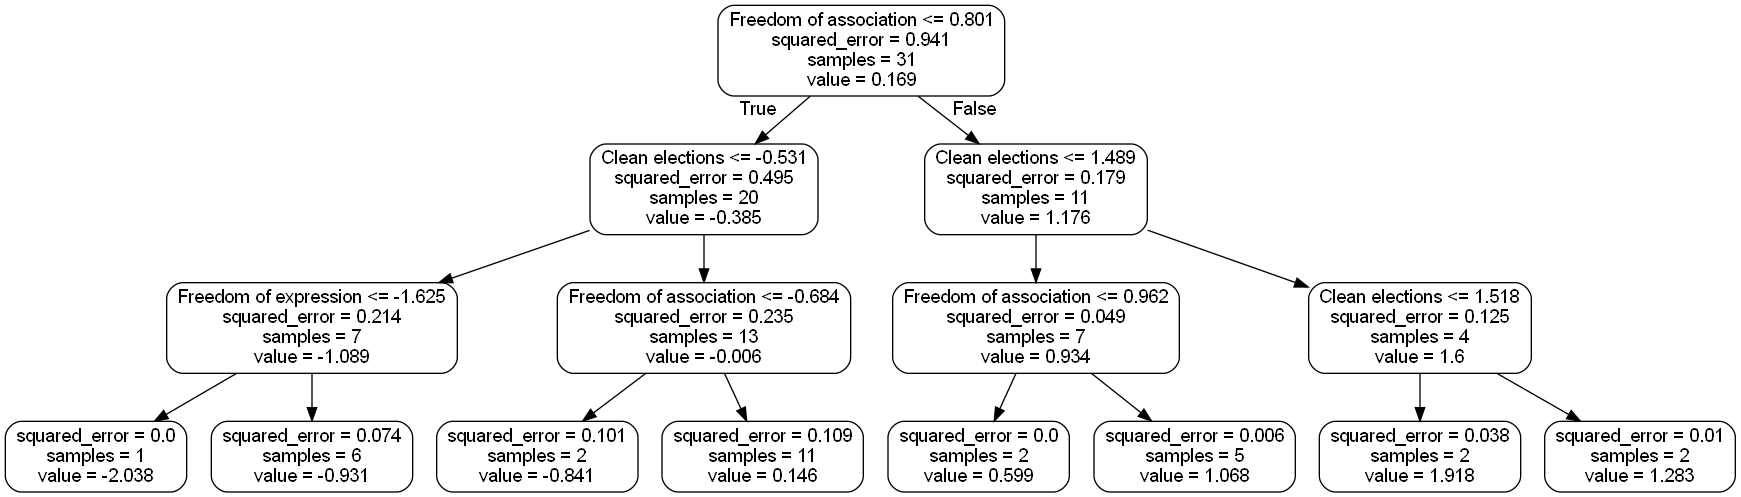

In [75]:
from IPython.display import Image
Image(filename='results/dtr_pruned.png')

You can see the influence of setting the `max_depth` parameter to 3 in the tree: rather
than a sprawling monstrosity, we now have a tree that neatly terminates each branch at
the same level. Decision trees have other parameters you can tweak, such as `min_samples_leaf`; it’s worth looking at the documentation to see the options available to you! Using only `max_depth`, we managed to get a good result, but we’re unlikely to be able to do much better using regularization alone. As we saw with ridge
and lasso regression, regularization usually reaches a "sweet spot" at some modest
value, but as the strength of the regularization increases, the model’s performance
nosedives. Decision trees have, by their nature, low granularity. You can’t perform fine-grained regularization on a single decision tree the same way you could for an `alpha`
parameter on a ridge or lasso regression (what would a `max_depth` of 3.5 even look
like?). It’s likely that no regularization of a single-tree model will eliminate overfitting
entirely. Instead, we’ll have to turn to a method which will allow us to combine many,
many trees.

MENTION https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html AND https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html AND WHY GRADIENT BOOSTED MACHINES ARE CONSIDERED BETTER

#### Gradient Boosted Machines

While random forests remain one of the best and most widely used approaches to
supervised machine learning, a slightly newer approach to ensembling decision trees
has recently started outperforming random forests and is widely considered to be one of
the best algorithms for doing machine learning on anything other than image or
perception data (Chollet, 2018). This technique is called **gradient boosting**, and it
differs from the random forest approach in that rather than allowing all of the decision
trees to randomly pursue the best answer possible in isolation (as random forest does),
it attempts to fit trees that better account for the misclassified observations from
previous trees. In this way, each tree tackles the *room for improvement* left behind by
the tree that immediately preceded it. The effect here is that the gradient-boosted trees
can reach a remarkably high degree of accuracy using only a small handful of
estimators (but are accordingly prone to overfitting). Let’s try creating one now:

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X=X_regression_train, y=y_regression_train)
score_cv_gbr = cross_val_score(estimator=gbr, X=X_regression_train, y=y_regression_train, cv=shufflesplit)
score_cv_gbr.mean().round(3)

0.711

The gradient-boosted trees achieved worse performance than our previous two models.
Usually, we would expect a gradient-boosted trees model to outperform all of our other
decision tree models (ensemble or otherwise), but that shouldn’t be interpreted as a
good reason to skip straight to gradient boost without bothering to specify and fit any
other models. What we’ve seen here is evidence to that point; there is value in fitting
*intermediate* models to see how their performance and idiosyncrasies compare to the
cutting-edge techniques. There are a few reasons why this is a vital practice.

- *Advanced, complicated methods are not intrinsically better than simple methods*: not
only is this true in our example – given that one of the most demonstrably powerful and
widely applicable algorithms, gradient boosting, failed to outperform random forests –
but it is often true in general. Cutting-edge methods are indispensable for their ability to
tackle cutting-edge issues, but they’re often overkill for the kinds of problems they get
applied to.

- *Don’t sacrifice interpretability without good cause*: explicable, interpretable, transparent
models that slightly underperform are often more valuable than top-performing ‘black
box’ models that appear to be more accurate, but for reasons that are hard to establish.
Gradient-boosted models are more difficult to interpret than decision tree models, so the
advantages of the former over the latter should be considered in light of the
interpretability trade-off.

- *Any problem in machine learning should be tackled using multiple approaches*: even if
you feel like you can’t improve on your model, there may be undiscovered issues lurking
beneath the surface. Applying a multitude of modelling strategies to a problem – even in
cases where your first model is performing well – may help confirm the defensibility of
your primary approach, give you more inferential insight, or uncover contingencies that
need to be addressed.

One problem common to all tree-based models (ensemble or otherwise) is that they
require an abundance of data and are especially prone to overfitting in cases where
such data is not forthcoming. There are different ways to make up for a lack of
data.

In [106]:
# interpretibility of GradientBoostingRegressor


#### Multi-Layer Perceptron Regression

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(random_state=42).fit(X=X_regression_train, y=y_regression_train)
score_cv_mlpr = cross_val_score(estimator=mlpr, X=X_regression_train, y=y_regression_train, cv=shufflesplit)
score_cv_mlpr.mean().round(3)

0.689

In [122]:
# interpretibility of MLPRegressor
mlpr.coefs_

[array([[-6.52946119e-02,  1.77122198e-01,  1.30884171e-01,
          1.36999376e-02, -2.06569252e-01, -2.92465192e-01,
         -1.71958759e-01,  1.37976595e-01,  9.44424098e-02,
          9.62438284e-02, -2.31835407e-01,  2.54683830e-01,
          2.01822064e-01, -1.73128657e-01, -1.23433935e-01,
         -1.70122567e-01, -3.58259330e-02, -1.19190561e-03,
          1.89460935e-03, -9.24994155e-02,  1.49392164e-02,
         -2.03444224e-01, -9.77956780e-02, -5.72881404e-02,
          1.72468427e-02,  9.73077628e-02, -1.74223881e-01,
          5.15798920e-02,  2.74094590e-02, -2.33374563e-01,
          9.04949720e-02, -1.19548380e-01, -8.11586736e-02,
          3.59793754e-01,  1.81381606e-01,  1.45873093e-01,
         -4.21860730e-02, -1.75480607e-01,  8.11339586e-02,
         -9.28954105e-02, -2.14330664e-01, -1.73083880e-03,
         -2.29254889e-01,  1.66935216e-01, -1.28340631e-01,
          1.17085343e-01, -6.85789135e-02,  2.64105474e-02,
          3.32640842e-02, -1.49837306e-0

#### Model selection

- By interpretability
- By predictive accuracy

In [ ]:
lr
ridge
dtr
dtr_pruned
gbr
mlpr

In [129]:
mlpr.score(X=X_regression_test, y=y_regression_test)

0.6484397152655574

### CLASSIFICATION WITH LOGISTIC REGRESSION

When the goal is classification, logistic regression provides better results than the
models in the previous section. It’s also highly interpretable and can be used for binary
or multi-class classification problems. It’s a very flexible model, in part because it
doesn’t assume a linear relationship between the response variable and our explanatory
feature matrix. While similar to linear regression in many ways, rather than predict a
numerical outcome for a variable, logistic regression describes the probability that an
observation would have a particular value in a categorical variable. Logistic regression
is typically conducted using two classes, but it can also be extended to multiple classes.

Given that logistic regression is designed to answer different kinds of questions than
linear regression, we’re going to have to create a new set of training and test data. Let’s
say we want to predict whether a given country is governed democratically, as opposed
to autocratically. We have a variable from the VDEM dataset that will serve for this
purpose: it is a 4-point scale, with

- 0 representing closed autocracies,
- 1 representing electoral autocracies,
- 2 representing electoral democracies, and
- 3 representing liberal democracies.

We’re going to simplify this down to a 2-point scale, with **0** indicating **autocracies**, and **1**
indicating **democracies**. Using this recoding, we can use binary logistic regression to
predict the probability that any given country in our dataset belongs to one of the two
categories. Our predictions will be based on the five measures of internet freedom
drawn from the VDEM dataset, briefly discussed earlier in this notebook. We'll create our new X and y like this:

In [79]:
y = np.where(vdem["v2x_regime"] <= 1, 0, 1).copy()

X = vdem[[
                 'v2smgovdom_osp', 
                 "v2smgovfilprc_osp", 
                 "v2smgovsmcenprc_osp", 
                 "v2smonper_osp", 
                 "v2smarrest_osp", 
]]

KeyError: "None of [Index(['v2smgovdom_osp', 'v2smgovfilprc_osp', 'v2smgovsmcenprc_osp',\n       'v2smonper_osp', 'v2smarrest_osp'],\n      dtype='object')] are in the [columns]"

Now we perform a new train–test split and estimate our binary logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
shuffsplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

log_reg = cross_val_score(
    LogisticRegression(), 
    X_train, 
    y_train, 
    cv=shuffsplit)
print(log_reg)
print(f"Mean: {log_reg.mean()}")

As before, we could use regularization to deal with underfitting and overfitting problems.
In this case, the parameter that controls regularization is called `C`. The logic is similar to
when we used `alpha`, but it goes in the opposite direction. Increasing the
value of `C` reduces regularization and results in more complex models that can learn
more from the training data. Decreasing `C` results in more regularization that constrains
how much the model can learn from the training data. So when we set a low value for `C`,
the logistic regression model will force the coefficients to be closer to 0, but not exactly 0. The code for accomplishing this is like this:

In [ ]:
log_reg_regularized = cross_val_score(
    LogisticRegression(C=0.5), 
    X_train, 
    y_train, 
    cv=shuffsplit)
print(log_reg_regularized)
print(f"Mean: {log_reg_regularized.mean()}")

In this case, altering our regularization parameter didn’t help at all. Rather than bury this
result or massage it to produce a desirable outcome, we’re going to preserve this as a
reminder that using reasonable techniques in machine learning can often produce
uninteresting, uninformative, or confusing results.
Despite the roadblock we encountered here, it should be clear that it is relatively
straightforward to use linear and logistic regression models, with and without
regularization to prevent overfitting, within a supervised machine learning framework.
You might also have noticed that we did not need to write a lot of code to do the actual
learning.

##### CONCLUSION

The key points in this section were as follows:

- We used Sklearn to set up, build, fit, and interpret supervised machine learning
models.

- We learnt how to prepare data by splitting our features into two different arrays, one
containing the labels we want to predict (quantitative or categorical) and the other
containing the values we want to use in our predictions.

- We learnt how to use cross-validation to remove the need for a separate validation
split and to harness the entire training set when tuning hyperparameters.

### Classification: Decision trees and random forests

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

In the previous section, we worked with a few simple and relatively familiar supervised learning models. In this section we will continue that with some other types of models: **decision trees**, **ensemble learning**, **random forests**, and **gradient-boosted
machines**. We will finish with a description of model evaluation metrics, comparing
accuracy, precision, recall, and some ways we can make better use of these metrics.

##### The Train-Test Split and Cross-Validation

Same as the previous section, we will use the VDEM data on a country’s political and electoral freedoms to predict internet freedoms drawn from the Freedom House dataset. We will begin with splitting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

#### RULES-BASED LEARNING WITH TREES

Decision trees can be used for both classification and regression tasks. Here we will focus on a classification example, but the process is more or less the same for the regression tasks.

A decision tree is in fact a directed network that starts with a single node including every instance in the data set. Beginning from that node, it *asks* a series of *questions* in order to find the correct labels in a classification problem, or the correct values in a regression problem. A good decision tree should ask the most informative questions in each step; we will see how it can be done shortly. The questions will always concern the value for
some specific feature for each instance, like *Does Canada hold free and fair
elections?* or *Is Canada’s score for freedom of the press higher than the median
score?*

Every time the model asks a question, a node containing some subset of instances in
our dataset splits off into two new nodes. Depending on the answer to the question,
each observation moves from the parent node into one of the two child nodes. This
process continues until 
- All of the observations contained in a node share the same value for the outcome you want the model to be able to predict, or
- Your tree model runs out of room to ask more questions.

The path from the root node
(every instance in the dataset) to each leaf in the tree constitutes a *rule*. We can collect
all of these rules into a single hierarchical rule base that is relatively easy for humans to
interpret and understand.

Now that we know the basics, it’s time to answer a critical question: *How does the
model decide which question to ask next?* How does it know what the *most informative*
question is? The most common method is to use the concept of entropy from
information theory. In information theory, entropy is a measure of how much information
something contains, expressed in terms of uncertainty.

To use a simplified example, let’s say we want to figure out which of the nations in the
VDEM dataset are democracies. If you think elections are all you need to be considered
a democracy, then you could just ask one question for each case – do they hold
elections? *However*, not all elections are the same, and democracies are about much
more than elections. So you keep asking questions until you are confident you can
make a good judgement. The more questions you need to ask to arrive at a confident
judgement, the more accurate your classification of the observations into "democracies"
and "autocracies" will be. The more purely separated those two classes become, the
lower the "entropy" in your model. In the context of a decision tree analysis, the model
will *always* ask the question that will result in the biggest decrease in entropy, usually
expressed in terms of **information gain**, which quantifies the decrease in entropy that
resulted from asking the question.

At this point, there shouldn’t be much doubt about how easily the VDEM dataset we’ve
been using up until here can be classified; nevertheless, we are going to use it
here again. We are not going to do so because it will provide us with a better
classification (we already achieved very good scores using a logistic regression) but
rather because the resultant decision tree model will allow us to easily see what
information the model finds most useful when deciding whether a nation is an autocracy
or a democracy.

As usual, we will start by splitting our dataset into a matrix `X` and and outcome vector `y`:

<div class='alert alert-block alert-danger'>
<b>NOTE:</b>
    
I used `vdem` instead of `dem_indices` in the follwoing cells. Let me know if it is incorrect, so that I will modify it. 
</div>

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.preprocessing import LabelEncoder

# dem_indices = pd.read_csv("../data/vdem_internet_freedom_combined/dem_indices.csv")

X = vdem[[
                 'v2smgovdom_osp', # Government dissemination of false information domestic
                 "v2smgovfilprc_osp", # Government internet filtering in practice
                 "v2smgovsmcenprc_osp", # Government social media censorship in practice
                 "v2smonper_osp", # Diversity of online media perspectives (0 = gov't only, 4 = any perspective)
                 "v2smarrest_osp", # Arrests for political content disseminated online
]]

interpretable_names = [
    'Domestic Misinformation',
    'Internet Filtering',
    'Social Media Censorship',
    'Online Media Diversity',
    'Arrests for Political Content'
]

regime_types = [
    'Autocracy',
    'Democracy',
]


le = LabelEncoder()
labels = le.fit_transform(regime_types)

y = np.where(vdem["v2x_regime"] <= 1, 0, 1).copy()

The technique we’re using to convert the 4-point `v2x_regime` scale into a binary
variable is identical to the one we employed in the previous section.
With `X` and `y` created, we can create our training and test sets, and then create and fit
our decision tree classifier using cross-validation (in much the same way as we did in
the previous section; go back to it for more details on cross-validation).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

shuffsplit = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

dtclass = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dtclass, X_train, y_train, cv=shuffsplit)
print(dt_scores)
print(f"Mean: {dt_scores.mean()}")

In order to get a sense of what our tree is doing under the hood, the below picture
represents our decision tree. You start at the top node, which contains all of the
observations (countries in this case). The top line in that node (and every non-leaf node
in the remainder of the tree) indicates the rule it will use to split the data. All of the
countries for which that statement is true will travel along the **True** path for further
subdivision. All of the nations for whom this condition does not apply travel along the
**False** path.

<img src='images/decisiontree1.jpg' style='height: 700px; float: left'>

In [ ]:
# vdem.v2x_regime

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [ ]:
# To be added: wrapping in graphviz.Source()

In [ ]:
from sklearn import preprocessing

dt_fitted = dtclass.fit(X_train, y_train)

export_graphviz(
    dtclass,
    out_file='../graphical_models/classified_1.gv', 
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

##### What About Overfitting?

Decision trees are also prone to overfitting. The tree grows bigger with every question, and by the time we’ve reached the leaves, we know
everything we need to know to make predictions that are 100% right 100% of the time -*for the data we trained the model on*. This extreme overfitting is sometimes called
**memorizing** the training data. We don’t want that!

One way to address the overfitting problem with decision trees is to **prune** them.
Remember that the model *always* asks the most informative question first. This means
that as the trees get deeper and deeper (as we ask more questions), each feature is
weaker or less predictive than those that came before it. As we move further and further
out, we risk making decisions based on noise and overfitting the model to the data we
have. The full tree, then, is typically *worse* than a pruned tree because it includes weak
features that could be specific to our dataset and which do not generalize.

We constrain the depth of the tree by restricting the number of questions or decisions
that the model is allowed to ask, and in doing so, we improve the ability of our model to
generalize to data it hasn’t seen before. If we set the maximum depth of our tree to 6,
for example, the models can only ask the six most informative questions, at which point
it must make its prediction. Obviously, this reduces the accuracy on the training data,
but not as much as you might think. It’s the unseen data we care most about, and the
pruned model will make much better predictions when it is not overfitted.

In Sklearn, we specify the maximum depth of the tree in advance. This can be done using the `max_depth` argument for the `DecisionTreeClassifier()`. Let’s set it to 3. This will produce a very shallow tree, but that’s desirable; we want it to have to make the best decisions it can in broad strokes. This way, the model will be less likely to overfit the training data.

In [ ]:
dtclass_pruned = DecisionTreeClassifier(max_depth=3, random_state=0)
dt_scores = cross_val_score(dtclass_pruned, X_train, y_train, cv=shuffsplit)
print(dt_scores)
print(f"Mean: {dt_scores.mean()}")

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [ ]:
dtclass_pruned.fit(X_train, y_train)

export_graphviz(
    dtclass_pruned,
    out_file='../graphical_models/pruned.gv',
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

In [ ]:
dtclass_pruned.score(X_test, y_test)

We’ve already seen a modest improvement, which probably represents a
slight reduction in overfitting (something that cross-validation automatically assesses).
Let’s examine the tree again:


<img src='images/decisiontree2.jpg' style='height: 400px; float: left'>

You can see the influence of setting the `max_depth` parameter to 3 in the tree: rather
than a sprawling monstrosity, we now have a tree that neatly terminates each branch at
the same level. Decision trees have other parameters you can tweak, such as `min_samples_leaf`; it’s worth looking at the documentation to see the options available to you! Using only `max_depth`, we managed to get a good result, but we’re unlikely to be able to do much better using regularization alone. As we saw with ridge
and lasso regression, regularization usually reaches a "sweet spot" at some modest
value, but as the strength of the regularization increases, the model’s performance
nosedives. Decision trees have, by their nature, low granularity. You can’t perform fine-grained regularization on a single decision tree the same way you could for an `alpha`
parameter on a ridge or lasso regression (what would a `max_depth` of 3.5 even look
like?). It’s likely that no regularization of a single-tree model will eliminate overfitting
entirely. Instead, we’ll have to turn to a method which will allow us to combine many,
many trees.

#### ENSEMBLE LEARNING

In order to tackle the overfitting problem, an effective way is to use an ensemble approach, which combines predictions from multiple models into a single prediction that
is better than that of any individual model. As you will soon learn, this approach tends to
produce excellent results and does not require any pruning. Ensembles of decision
trees produce better results than any one decision tree, including any of the individual
decision trees in the ensemble.

To work with an ensemble of decision trees, we first draw many bootstrapped samples
of instances from our overall dataset. In a bootstrapped sample, replacement is allowed,
which means that the same instance can be sampled more than once. For each sample,
we fit a decision tree and record the model’s predictions. The final predictions are made
by an *election* of sorts, where each tree *votes* on the class they think each
observation belongs to. If we take 200 samples, we would fit 200 decision trees. These
modes are used collectively -as an ensemble- to make predictions on new instances
by taking averages of the predictions made by the models that make up the ensemble.
This process is called **bagging** or **bootstrapped aggregation**, and it can be applied not
only to decision trees but also to a wide variety of the classification models implemented
in scikit-learn. For now, we will stick to applying it to decision trees.

Bagging or bootstrapped aggregation goes a very long way in addressing the overfitting
problem. One major advantage is that we don’t have to prune our decision trees. In fact,
it’s better if we don’t! If we let each tree grow to be as deep and complex as it likes, we
will end up with an ensemble that has high variance but low bias. That’s exactly what we
want when we go to make our final aggregated predictions. The important choice you
must make is how many bags to use, or rather, how many bootstrapped samples of
instances to draw, and the number of total trees we want to end up with. Let’s see what
the combination of 100 trees can bring us:

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_of_trees = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=100,
                                bootstrap=True,
                                random_state=0)

bt_scores = cross_val_score(bag_of_trees, X_train, y_train, cv=shuffsplit)
print(bt_scores)
print(f"Mean: {bt_scores.mean()}")

The unregularized bagging classifier has produced an even better score than the
regularized decision tree did! There may yet be more room for improvement if we alter
how each of the trees functions using a random forest model.

#### Random Forests

One issue with the bagging approach is that the resulting trees tend to be correlated
with one another, mainly due to the fact that they are all trying to maximize the same
thing when they ask questions – information gain. If there are some very powerful
attributes in our dataset, as there almost always are, the tree we fit for each bag will
lean heavily on those features, which makes the whole ensemble approach a lot less
useful and degrades the quality of the final prediction. It would be much better for us if
the trees are not correlated, or are at best weakly correlated.

Random forests accomplish this with one simple, but highly effective, modification: *they
constrain the features that any given node is allowed to ask questions about*. The result
is a collection of decision trees that are uncorrelated, or weakly correlated, with one
another, which leads to more accurate predictions when they are aggregated.

Random forests are straightforward to train, and because of their clever design, they do
a good job of dealing with noise and preventing overfitting, so it is not necessary to trim
or prune the trees. They also take only two hyperparameters: **the number of trees in the
forest** (i.e. the number of samples of instances to draw) and **the size of the random
sample** to draw when sampling the features that any given decision tree will select from.
You can and should experiment with cross-validation to select values for these
hyperparameters that result in the most accurate predictions (we’re not doing so here
because space is limited).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=100,
                                max_features=2,
                                random_state=0)

rforest_scores = cross_val_score(rforest, X_train, y_train, cv=shuffsplit)
print(rforest_scores)
print(f"Mean: {rforest_scores.mean()}")

It would appear that our random forest model, with modest parameters, is producing the
*exact same result* as we got with our bagging classifier.

The downside of random forests is that – unlike garden-variety decision trees – the
results are not so easy to interpret. For this reason, random forests and other ensemble
models are generally considered to be less *interpretable* than simple decision trees,
linear and logistic regressions, or k-nearest neighbours. While you can inspect any of
the trees in your random forest classifier, this process is complicated somewhat by the
fact that our model contains 100 distinct trees, and we can’t easily determine how
significant any one tree was to the overall decision-making process. Nevertheless, it’s a
good idea to select a a tree at random and take a look at what it did with the data. Of
course, you can do this many different times, if you like. Just select different trees each
time. One such tree is shown the following picture:

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [ ]:
rforest.fit(X_train, y_train)

export_graphviz(
    rforest.estimators_[6],
    out_file='../graphical_models/rf_classified.gv',
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

<img src='images/decisiontree3.jpg' style='height: 600px; float: left'>

#### Gradient Boosted Machines

While random forests remain one of the best and most widely used approaches to
supervised machine learning, a slightly newer approach to ensembling decision trees
has recently started outperforming random forests and is widely considered to be one of
the best algorithms for doing machine learning on anything other than image or
perception data (Chollet, 2018). This technique is called **gradient boosting**, and it
differs from the random forest approach in that rather than allowing all of the decision
trees to randomly pursue the best answer possible in isolation (as random forest does),
it attempts to fit trees that better account for the misclassified observations from
previous trees. In this way, each tree tackles the *room for improvement* left behind by
the tree that immediately preceded it. The effect here is that the gradient-boosted trees
can reach a remarkably high degree of accuracy using only a small handful of
estimators (but are accordingly prone to overfitting). Let’s try creating one now:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(n_estimators=100,
                                random_state=0)

gboost_scores = cross_val_score(gboost, X_train, y_train, cv=shuffsplit)
print(gboost_scores)
print(f"Mean: {gboost_scores.mean()}")

The gradient-boosted trees achieved worse performance than our previous two models.
Usually, we would expect a gradient-boosted trees model to outperform all of our other
decision tree models (ensemble or otherwise), but that shouldn’t be interpreted as a
good reason to skip straight to gradient boost without bothering to specify and fit any
other models. What we’ve seen here is evidence to that point; there is value in fitting
*intermediate* models to see how their performance and idiosyncrasies compare to the
cutting-edge techniques. There are a few reasons why this is a vital practice.

- *Advanced, complicated methods are not intrinsically better than simple methods*: not
only is this true in our example – given that one of the most demonstrably powerful and
widely applicable algorithms, gradient boosting, failed to outperform random forests –
but it is often true in general. Cutting-edge methods are indispensable for their ability to
tackle cutting-edge issues, but they’re often overkill for the kinds of problems they get
applied to.

- *Don’t sacrifice interpretability without good cause*: explicable, interpretable, transparent
models that slightly underperform are often more valuable than top-performing ‘black
box’ models that appear to be more accurate, but for reasons that are hard to establish.
Gradient-boosted models are more difficult to interpret than decision tree models, so the
advantages of the former over the latter should be considered in light of the
interpretability trade-off.

- *Any problem in machine learning should be tackled using multiple approaches*: even if
you feel like you can’t improve on your model, there may be undiscovered issues lurking
beneath the surface. Applying a multitude of modelling strategies to a problem – even in
cases where your first model is performing well – may help confirm the defensibility of
your primary approach, give you more inferential insight, or uncover contingencies that
need to be addressed.

One problem common to all tree-based models (ensemble or otherwise) is that they
require an abundance of data and are especially prone to overfitting in cases where
such data is not forthcoming. There are different ways to make up for a lack of
data.

Before we move on, let’s take a moment to compare how each of our tree-based
models perform on the test set which we split off from the training data right at the
beginning of this section and haven’t touched since:

In [ ]:
model_list = [dtclass,
dtclass_pruned,
bag_of_trees.fit(X_train, y_train),
rforest,
gboost.fit(X_train, y_train)]

for model in model_list:
    print(model.score(X_test, y_test))

Looks like the training results match up nicely with the test results.

BOXES: REFER TO SUPPORT VECTOR MACHINES AND NAIVE BAYES CLASSIFICATION

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

#### Notes to be removed before publication

- Check https://doi.org/10.1145/1150402.1150412
- add cvxopt=1.2.6 to environment.yml -- NOT NECSSARY ANYMORE CAUSE WE DON'T USE method=sqrt_lasso IN statsmodels RIDGE REGRESSION ANYMORE
- https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py
- ...